## This script reads CESM2 Snowmelt data downloaded from Casper in NCAR (Fig 12)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 
import matplotlib as mpl
import shapefile as shp
import cartopy.io.shapereader as shpreader
from numpy import linspace
from numpy import meshgrid
import matplotlib.colors as colors
from numpy import array, ma
import cartopy.crs as ccrs
import matplotlib.cm as cm
import cartopy.feature as cfeature

## Basin shape files

In [2]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'


In [3]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)

In [4]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())

In [5]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)

## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

## Lat

In [6]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

y_US = latUs_cesm2.shape[0]
print(y_US)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]
32


In [7]:
lats_Us = latUs_cesm2

## Lon

In [8]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

x_US = lonUs_cesm2.shape[0]
print(x_US)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
56


In [9]:
lons_Us = lonUs_cesm2

### Historical (1930-2014): 1020 months

In [10]:
file_histSel_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/monSnowMeltUsHistSelEnsMean.npy'
file_histSel_ensMean_loaded = np.load(file_histSel_ensMean)
print(file_histSel_ensMean_loaded.shape)

(1020, 32, 56)


### Scenario (2105-2100): 1032 months

In [11]:
file_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/monSnowMeltUsScenEnsMean.npy'
file_scen_ensMean_loaded = np.load(file_scen_ensMean)
print(file_scen_ensMean_loaded.shape)

(1032, 32, 56)


## Concatenate two data arrays

In [12]:
param_histSel_scen_ensMean_Us = np.concatenate((file_histSel_ensMean_loaded, file_scen_ensMean_loaded), axis=0)
print(param_histSel_scen_ensMean_Us.shape)

(2052, 32, 56)


## The two files (Hist selected and Scen)

In [13]:
print(file_histSel_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1020, 32, 56)
(1032, 32, 56)


## The four time slots

In [14]:

#histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## tsteps

In [15]:
nMonsPerYr = 12     # 
print(nMonsPerYr)

12


## Reference Period

In [16]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2001
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

492 854
362


## Era 1

In [17]:
scenEraOneStepSt = 0
scenEraOneStepEnd = (scenEraOneYrEnd - scenYrSt + 1)*nMonsPerYr + 2  # To include Jan and Feb of the following year in 2045
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

0 362
362


## Era 2

In [18]:
scenEraTwoStepSt = (scenEraTwoYrSt - scenYrSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraTwoYrEnd - scenYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2075
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

360 722
362


## Era 3

In [19]:
scenEraThreeStepSt = (scenEraThreeYrSt - scenYrSt)*nMonsPerYr
scenEraThreeStepEnd = (scenYrEnd - scenYrSt + 1)*nMonsPerYr    # Data ends at Dec, 2100
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

720 1032
312


## Subsetting the data into different periods / Eras

In [20]:
print(file_histSel_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1020, 32, 56)
(1032, 32, 56)


In [21]:
param_refPeriod_Us_ensmean = file_histSel_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

(362, 32, 56)


In [22]:
param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

(362, 32, 56)


In [23]:
param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

(362, 32, 56)


In [24]:
param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Seasons start here

In [25]:
print(nMonsPerYr)

12


In [26]:
param_refPeriod_Us_ensmean = file_histSel_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(362, 32, 56)
(362, 32, 56)
(362, 32, 56)
(312, 32, 56)


## MAM

## ref Period

In [27]:
mamMonSt = 3
mamMonMid = 4
mamMonEnd = 5

In [28]:

param_mamSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_refPeriod_Us_ensmean.shape)

param_mamMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_refPeriod_Us_ensmean.shape)

param_mamEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [29]:
param_mamSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamSt_refPeriod_Us_ensmean, axis = 0)
print(param_mamSt_refPeriod_Us_ensmean_timeAvg.shape)

param_mamMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamMid_refPeriod_Us_ensmean, axis = 0)
print(param_mamMid_refPeriod_Us_ensmean_timeAvg.shape)

param_mamEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_refPeriod_Us_ensmean, axis = 0)
print(param_mamEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [30]:
param_mamTot_refPeriod_Us_ensmean_timeAvg = (param_mamSt_refPeriod_Us_ensmean_timeAvg+param_mamMid_refPeriod_Us_ensmean_timeAvg+param_mamEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_mamTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [31]:

param_mamSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraOne_Us_ensmean.shape)

param_mamMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraOne_Us_ensmean.shape)

param_mamEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [32]:
param_mamSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraOne_Us_ensmean, axis = 0)
print(param_mamSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraOne_Us_ensmean, axis = 0)
print(param_mamMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [33]:
param_mamTot_scenEraOne_Us_ensmean_timeAvg = (param_mamSt_scenEraOne_Us_ensmean_timeAvg+param_mamMid_scenEraOne_Us_ensmean_timeAvg+param_mamEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [34]:

param_mamSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraTwo_Us_ensmean.shape)

param_mamMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraTwo_Us_ensmean.shape)

param_mamEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [35]:
param_mamSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [36]:
param_mamTot_scenEraTwo_Us_ensmean_timeAvg = (param_mamSt_scenEraTwo_Us_ensmean_timeAvg+param_mamMid_scenEraTwo_Us_ensmean_timeAvg+param_mamEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [37]:

param_mamSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraThree_Us_ensmean.shape)

param_mamMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraThree_Us_ensmean.shape)

param_mamEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [38]:
param_mamSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraThree_Us_ensmean, axis = 0)
print(param_mamSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraThree_Us_ensmean, axis = 0)
print(param_mamMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [39]:
param_mamTot_scenEraThree_Us_ensmean_timeAvg = (param_mamSt_scenEraThree_Us_ensmean_timeAvg+param_mamMid_scenEraThree_Us_ensmean_timeAvg+param_mamEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [40]:
param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraOne_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [41]:
param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraTwo_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [42]:
param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraThree_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (MAM)

## Writing in an Xarray Data array

In [43]:
y_Us, x_Us = param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape
             
#print(t_histSel_scen)
print(y_Us)
print(x_Us)
#print(ens_size)

32
56


In [44]:
param_mamTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraOne_diff_Us_xarray.shape)
print(param_mamTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -2.54319176, -54.13524018, ...,  14.02058918,
          9.99353496,  -5.27286022],
       [ -2.6796368 , -52.87575807, -20.86891262, ...,  30.35125213,
         29.84207303,  -2.21005673],
       [-47.36464574, -36.95620993, -22.04776718, ...,  17.29877642,
         26.09505294,  14.80641111]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [45]:
param_mamTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraTwo_diff_Us_xarray.shape)
print(param_mamTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,   -4.01583737, -111.69912038, ...,   -5.75509117,
           0.63714675,  -21.46606075],
       [  -4.43568222,  -93.62284511,  -67.39672332, ...,   46.123028  ,
          17.09960783,  -20.81311159],
       [ -81.69367269,  -89.33454246,  -56.7439184 , ...,   27.67682831,
          41.70436179,    4.66920013]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [46]:
param_mamTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])

print(param_mamTot_scenEraThree_diff_Us_xarray.shape)
print(param_mamTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,   -4.62505288, -154.40694009, ...,  -23.73690436,
         -26.20558343,  -54.5328513 ],
       [  -5.16437889, -116.32418576, -135.22994251, ...,   53.16244813,
           4.19883314,  -42.81940808],
       [-101.13752951, -156.82115912, -109.56827352, ...,   33.40937944,
          55.25821912,   -8.8426514 ]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [47]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [48]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [49]:
param_mamTot_scenEraOne_diff_masked_Missi = param_mamTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraOne_diff_masked_Missi.shape)
print(param_mamTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [50]:
param_mamTot_scenEraTwo_diff_masked_Missi = param_mamTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraTwo_diff_masked_Missi.shape)
print(param_mamTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [51]:
param_mamTot_scenEraThree_diff_masked_Missi = param_mamTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraThree_diff_masked_Missi.shape)
print(param_mamTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [52]:
maxVal_mamTot_diff_masked_scenEraOne = np.nanmax(param_mamTot_scenEraOne_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraOne)
minVal_mamTot_diff_masked_scenEraOne = np.nanmin(param_mamTot_scenEraOne_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraOne)

-0.003211984649532938
-39.77501984890282


In [53]:
maxVal_mamTot_diff_masked_scenEraTwo = np.nanmax(param_mamTot_scenEraTwo_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraTwo)
minVal_mamTot_diff_masked_scenEraTwo = np.nanmin(param_mamTot_scenEraTwo_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraTwo)

-0.0034427569868907748
-59.16932667593831


In [54]:
maxVal_mamTot_diff_masked_scenEraThree = np.nanmax(param_mamTot_scenEraThree_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraThree)
minVal_mamTot_diff_masked_scenEraThree = np.nanmin(param_mamTot_scenEraThree_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraThree)

-0.0034804946627254962
-82.81399746866542


## Plotting

In [55]:

latUsMin = lats_Us.min()     # = or = latsCfsDnSc
print(latUsMin)

latUsMax = lats_Us.max()
print(latUsMax)

lonUsMin = lons_Us.min()
print(lonUsMin)

lonUsMax = lons_Us.max()
print(lonUsMax)

24.973822
54.18848
230.0
298.75


In [56]:
extentUs = [lonUsMin, lonUsMax, latUsMin, latUsMax]
print(extentUs)

[230.0, 298.75, 24.973822, 54.18848]


In [57]:
x_Us = linspace(lonUsMin, lonUsMax, x_Us)
y_Us = linspace(latUsMin, latUsMax, y_Us)
print(x_Us)
print(y_Us)

# Create the rectangular grid out of these values
xx_Us, yy_Us = meshgrid(x_Us, y_Us)


[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
[24.97382164 25.91622999 26.85863833 27.80104668 28.74345503 29.68586337
 30.62827172 31.57068006 32.51308841 33.45549676 34.3979051  35.34031345
 36.2827218  37.22513014 38.16753849 39.10994684 40.05235518 40.99476353
 41.93717187 42.87958022 43.82198857 44.76439691 45.70680526 46.64921361
 47.59162195 48.5340303  49.47643865 50.41884699 51.36125534 52.30366368
 53.24607203 54.18848038]


In [58]:
vmin_mamTot_scenEraOne = np.floor(minVal_mamTot_diff_masked_scenEraOne)
vmax_mamTot_scenEraOne = np.ceil(maxVal_mamTot_diff_masked_scenEraOne)
print(vmin_mamTot_scenEraOne)
print(vmax_mamTot_scenEraOne)

-40.0
-0.0


In [59]:
vmin_mamTot_scenEraTwo = np.floor(minVal_mamTot_diff_masked_scenEraTwo)
vmax_mamTot_scenEraTwo = np.ceil(maxVal_mamTot_diff_masked_scenEraTwo)
print(vmin_mamTot_scenEraTwo)
print(vmax_mamTot_scenEraTwo)

-60.0
-0.0


In [60]:
vmin_mamTot_scenEraThree = np.floor(minVal_mamTot_diff_masked_scenEraThree)
vmax_mamTot_scenEraThree = np.ceil(maxVal_mamTot_diff_masked_scenEraThree)
print(vmin_mamTot_scenEraThree)
print(vmax_mamTot_scenEraThree)

-83.0
-0.0


In [61]:
nDiv_mamTot_scenEraOne = int(vmax_mamTot_scenEraOne - vmin_mamTot_scenEraOne + 1)
print(nDiv_mamTot_scenEraOne)

41


In [62]:
nDiv_mamTot_scenEraTwo = int(vmax_mamTot_scenEraTwo - vmin_mamTot_scenEraTwo + 1)
print(nDiv_mamTot_scenEraTwo)

61


In [63]:

nDiv_mamTot_scenEraThree = int(vmax_mamTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_mamTot_scenEraThree)


84


## JJA

## ref Period

In [64]:
jjaMonSt = 6
jjaMonMid = 7
jjaMonEnd = 8

In [65]:

param_jjaSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_refPeriod_Us_ensmean.shape)

param_jjaMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_refPeriod_Us_ensmean.shape)

param_jjaEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [66]:
param_jjaSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_refPeriod_Us_ensmean, axis = 0)
print(param_jjaSt_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_refPeriod_Us_ensmean, axis = 0)
print(param_jjaMid_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_refPeriod_Us_ensmean, axis = 0)
print(param_jjaEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [67]:
param_jjaTot_refPeriod_Us_ensmean_timeAvg = (param_jjaSt_refPeriod_Us_ensmean_timeAvg+param_jjaMid_refPeriod_Us_ensmean_timeAvg+param_jjaEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_jjaTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [68]:

param_jjaSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraOne_Us_ensmean.shape)

param_jjaMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraOne_Us_ensmean.shape)

param_jjaEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [69]:
param_jjaSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [70]:
param_jjaTot_scenEraOne_Us_ensmean_timeAvg = (param_jjaSt_scenEraOne_Us_ensmean_timeAvg+param_jjaMid_scenEraOne_Us_ensmean_timeAvg+param_jjaEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [71]:

param_jjaSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraTwo_Us_ensmean.shape)

param_jjaMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraTwo_Us_ensmean.shape)

param_jjaEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [72]:
param_jjaSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [73]:
param_jjaTot_scenEraTwo_Us_ensmean_timeAvg = (param_jjaSt_scenEraTwo_Us_ensmean_timeAvg+param_jjaMid_scenEraTwo_Us_ensmean_timeAvg+param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [74]:

param_jjaSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraThree_Us_ensmean.shape)

param_jjaMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraThree_Us_ensmean.shape)

param_jjaEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [75]:
param_jjaSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [76]:
param_jjaTot_scenEraThree_Us_ensmean_timeAvg = (param_jjaSt_scenEraThree_Us_ensmean_timeAvg+param_jjaMid_scenEraThree_Us_ensmean_timeAvg+param_jjaEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [77]:
param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraOne_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [78]:
param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraTwo_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [79]:
param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraThree_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (JJA)

## Writing in an Xarray Data array

In [80]:
param_jjaTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])                                                  
print(param_jjaTot_scenEraOne_diff_Us_xarray.shape)
print(param_jjaTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -1.28866062e-07, -1.89557321e+01, ...,
        -4.23271639e+01, -1.56776153e+01, -6.00463020e+00],
       [-4.17953648e-07, -3.88519909e+00, -4.16795720e+01, ...,
        -5.41763788e+01, -4.80883747e+01, -2.49498910e+01],
       [-1.69632456e+00, -2.94653580e+01, -1.61784986e+01, ...,
        -4.15778235e+01, -5.23651773e+01, -4.92396849e+01]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [81]:
param_jjaTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])                                                      
print(param_jjaTot_scenEraTwo_diff_Us_xarray.shape)
print(param_jjaTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -1.28866062e-07, -2.56490225e+01, ...,
        -4.65721642e+01, -1.79886294e+01, -6.80156600e+00],
       [-4.17953648e-07, -4.30487034e+00, -6.27114868e+01, ...,
        -9.56403126e+01, -5.89449459e+01, -2.64523995e+01],
       [-1.84710794e+00, -4.52884860e+01, -2.57927965e+01, ...,
        -7.50615326e+01, -9.58994547e+01, -5.29701244e+01]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [82]:
param_jjaTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])                                                      
print(param_jjaTot_scenEraThree_diff_Us_xarray.shape)
print(param_jjaTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -1.28866062e-07, -2.66321511e+01, ...,
        -4.92692124e+01, -1.89339452e+01, -7.31895423e+00],
       [-4.17953648e-07, -4.35775296e+00, -6.82724520e+01, ...,
        -1.16656457e+02, -6.38720245e+01, -2.80549603e+01],
       [-1.85467397e+00, -4.97587421e+01, -2.90098091e+01, ...,
        -9.55029243e+01, -1.26844234e+02, -5.78232718e+01]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [83]:
param_jjaTot_scenEraOne_diff_masked_Missi = param_jjaTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraOne_diff_masked_Missi.shape)
print(param_jjaTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [84]:
param_jjaTot_scenEraTwo_diff_masked_Missi = param_jjaTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraTwo_diff_masked_Missi.shape)
print(param_jjaTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [85]:
param_jjaTot_scenEraThree_diff_masked_Missi = param_jjaTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraThree_diff_masked_Missi.shape)
print(param_jjaTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [86]:
maxVal_jjaTot_diff_masked_scenEraOne = np.nanmax(param_jjaTot_scenEraOne_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraOne)
minVal_jjaTot_diff_masked_scenEraOne = np.nanmin(param_jjaTot_scenEraOne_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraOne)

0.0011191624611409275
-0.19385742088178656


In [87]:
maxVal_jjaTot_diff_masked_scenEraTwo = np.nanmax(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraTwo)
minVal_jjaTot_diff_masked_scenEraTwo = np.nanmin(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraTwo)

0.0
-0.2219105059168093


In [88]:
maxVal_jjaTot_diff_masked_scenEraThree = np.nanmax(param_jjaTot_scenEraThree_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraThree)
minVal_jjaTot_diff_masked_scenEraThree = np.nanmin(param_jjaTot_scenEraThree_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraThree)

0.0
-0.22733803934200913


In [89]:
#vmin_jjaTot_scenEraThree = np.floor(minVal_jjaTot_percDiff_scenEraThree)
vmin_jjaTot_scenEraThree = np.floor(minVal_jjaTot_diff_masked_scenEraThree)

vmax_jjaTot_scenEraThree = np.ceil(maxVal_jjaTot_diff_masked_scenEraThree)
print(vmin_jjaTot_scenEraThree)
print(vmax_jjaTot_scenEraThree)

-1.0
0.0


In [90]:
nDiv_jjaTot_scenEraThree = int(vmax_jjaTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_jjaTot_scenEraThree)

2


## SON

## ref Period

In [91]:
sonMonSt = 9
sonMonMid = 10
sonMonEnd = 11

In [92]:

param_sonSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_refPeriod_Us_ensmean.shape)

param_sonMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_refPeriod_Us_ensmean.shape)

param_sonEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [93]:
param_sonSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonSt_refPeriod_Us_ensmean, axis = 0)
print(param_sonSt_refPeriod_Us_ensmean_timeAvg.shape)

param_sonMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonMid_refPeriod_Us_ensmean, axis = 0)
print(param_sonMid_refPeriod_Us_ensmean_timeAvg.shape)

param_sonEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_refPeriod_Us_ensmean, axis = 0)
print(param_sonEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [94]:
param_sonTot_refPeriod_Us_ensmean_timeAvg = (param_sonSt_refPeriod_Us_ensmean_timeAvg+param_sonMid_refPeriod_Us_ensmean_timeAvg+param_sonEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_sonTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [95]:

param_sonSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraOne_Us_ensmean.shape)

param_sonMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraOne_Us_ensmean.shape)

param_sonEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [96]:
param_sonSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraOne_Us_ensmean, axis = 0)
print(param_sonSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraOne_Us_ensmean, axis = 0)
print(param_sonMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [97]:
param_sonTot_scenEraOne_Us_ensmean_timeAvg = (param_sonSt_scenEraOne_Us_ensmean_timeAvg+param_sonMid_scenEraOne_Us_ensmean_timeAvg+param_sonEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [98]:

param_sonSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraTwo_Us_ensmean.shape)

param_sonMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraTwo_Us_ensmean.shape)

param_sonEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [99]:
param_sonSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [100]:
param_sonTot_scenEraTwo_Us_ensmean_timeAvg = (param_sonSt_scenEraTwo_Us_ensmean_timeAvg+param_sonMid_scenEraTwo_Us_ensmean_timeAvg+param_sonEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [101]:

param_sonSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraThree_Us_ensmean.shape)

param_sonMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraThree_Us_ensmean.shape)

param_sonEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [102]:
param_sonSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraThree_Us_ensmean, axis = 0)
print(param_sonSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraThree_Us_ensmean, axis = 0)
print(param_sonMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [103]:
param_sonTot_scenEraThree_Us_ensmean_timeAvg = (param_sonSt_scenEraThree_Us_ensmean_timeAvg+param_sonMid_scenEraThree_Us_ensmean_timeAvg+param_sonEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [104]:
param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraOne_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [105]:
param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraTwo_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [106]:
param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraThree_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (SON)


## Writing in an Xarray Data array

In [107]:
param_sonTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(param_sonTot_scenEraOne_diff_Us_xarray.shape)
print(param_sonTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.50986567,  -7.1610102 , ..., -12.48937737,
         -3.37164549,  -4.106175  ],
       [ -0.63196982,  -7.07895505,  -3.51791022, ...,  -5.0152149 ,
         -6.16185307, -13.38600228],
       [ -6.18236815,  -5.00967859,  -2.48018409, ...,  -3.45499254,
         -4.41004785, -10.18069545]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [108]:
param_sonTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(param_sonTot_scenEraTwo_diff_Us_xarray.shape)
print(param_sonTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.69103805, -14.11632435, ..., -20.45168011,
         -6.31120553,  -7.64559364],
       [ -0.8554285 , -12.29310828,  -9.51176826, ..., -13.06878646,
        -15.1203735 , -17.52836551],
       [-10.62201491, -11.13376072,  -5.77361975, ..., -10.29144   ,
        -11.46281244, -12.86333028]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [109]:
param_sonTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(param_sonTot_scenEraThree_diff_Us_xarray.shape)
print(param_sonTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.78130344, -20.23937407, ..., -24.36814272,
        -11.17888462, -12.82310481],
       [ -0.98402672, -15.99270382, -17.26129266, ..., -16.44608401,
        -18.83164711, -21.94898549],
       [-13.67531761, -18.57749184, -11.25442071, ..., -13.92898404,
        -15.02538711, -16.89033246]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [110]:
param_sonTot_scenEraOne_diff_masked_Missi = param_sonTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraOne_diff_masked_Missi.shape)
print(param_sonTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [111]:
param_sonTot_scenEraTwo_diff_masked_Missi = param_sonTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraTwo_diff_masked_Missi.shape)
print(param_sonTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [112]:
param_sonTot_scenEraThree_diff_masked_Missi = param_sonTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraThree_diff_masked_Missi.shape)
print(param_sonTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [113]:
maxVal_sonTot_diff_masked_scenEraOne = np.nanmax(param_sonTot_scenEraOne_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraOne)
minVal_sonTot_diff_masked_scenEraOne = np.nanmin(param_sonTot_scenEraOne_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraOne)

3.858490256225615e-05
-2.9121704818360925


In [114]:
maxVal_sonTot_diff_masked_scenEraTwo = np.nanmax(param_sonTot_scenEraTwo_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraTwo)
minVal_sonTot_diff_masked_scenEraTwo = np.nanmin(param_sonTot_scenEraTwo_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraTwo)

-9.81497614024744e-06
-4.569219191020279


In [115]:
maxVal_sonTot_diff_masked_scenEraThree = np.nanmax(param_sonTot_scenEraThree_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraThree)
minVal_sonTot_diff_masked_scenEraThree = np.nanmin(param_sonTot_scenEraThree_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraThree)

-9.81367367508879e-06
-6.216596469605849


In [116]:
vmin_sonTot_scenEraThree = np.floor(minVal_sonTot_diff_masked_scenEraThree)
vmax_sonTot_scenEraThree = np.ceil(maxVal_sonTot_diff_masked_scenEraThree)
print(vmin_sonTot_scenEraThree)
print(vmax_sonTot_scenEraThree)

-7.0
-0.0


In [117]:
nDiv_sonTot_scenEraThree = int(vmax_sonTot_scenEraThree - vmin_sonTot_scenEraThree + 1)
print(nDiv_sonTot_scenEraThree)

8


## DJF

## ref Period

In [118]:
djfMonSt = 12
djfMonMid = 1
djfMonEnd = 2

In [119]:

param_djfSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_refPeriod_Us_ensmean.shape)

param_djfMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_refPeriod_Us_ensmean = param_djfMid_refPeriod_Us_ensmean[1::]
print(param_djfMid_refPeriod_Us_ensmean.shape)

param_djfEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_refPeriod_Us_ensmean = param_djfEnd_refPeriod_Us_ensmean[1::]
print(param_djfEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [120]:
param_djfSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfSt_refPeriod_Us_ensmean, axis = 0)
print(param_djfSt_refPeriod_Us_ensmean_timeAvg.shape)

param_djfMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfMid_refPeriod_Us_ensmean, axis = 0)
print(param_djfMid_refPeriod_Us_ensmean_timeAvg.shape)

param_djfEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_refPeriod_Us_ensmean, axis = 0)
print(param_djfEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [121]:
param_djfTot_refPeriod_Us_ensmean_timeAvg = (param_djfSt_refPeriod_Us_ensmean_timeAvg+param_djfMid_refPeriod_Us_ensmean_timeAvg+param_djfEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_djfTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [122]:

param_djfSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraOne_Us_ensmean.shape)

param_djfMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraOne_Us_ensmean = param_djfMid_scenEraOne_Us_ensmean[1::]
print(param_djfMid_scenEraOne_Us_ensmean.shape)

param_djfEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraOne_Us_ensmean = param_djfEnd_scenEraOne_Us_ensmean[1::]
print(param_djfEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [123]:
param_djfSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraOne_Us_ensmean, axis = 0)
print(param_djfSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraOne_Us_ensmean, axis = 0)
print(param_djfMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [124]:
param_djfTot_scenEraOne_Us_ensmean_timeAvg = (param_djfSt_scenEraOne_Us_ensmean_timeAvg+param_djfMid_scenEraOne_Us_ensmean_timeAvg+param_djfEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [125]:

param_djfSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraTwo_Us_ensmean.shape)

param_djfMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraTwo_Us_ensmean = param_djfMid_scenEraTwo_Us_ensmean[1::]
print(param_djfMid_scenEraTwo_Us_ensmean.shape)

param_djfEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraTwo_Us_ensmean = param_djfEnd_scenEraTwo_Us_ensmean[1::]
print(param_djfEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [126]:
param_djfSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [127]:
param_djfTot_scenEraTwo_Us_ensmean_timeAvg = (param_djfSt_scenEraTwo_Us_ensmean_timeAvg+param_djfMid_scenEraTwo_Us_ensmean_timeAvg+param_djfEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [128]:

param_djfSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraThree_Us_ensmean.shape)

param_djfMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonMid-1::nMonsPerYr]
print(param_djfMid_scenEraThree_Us_ensmean.shape)

param_djfEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonEnd-1::nMonsPerYr]
print(param_djfEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [129]:
param_djfSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraThree_Us_ensmean, axis = 0)
print(param_djfSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraThree_Us_ensmean, axis = 0)
print(param_djfMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [130]:
param_djfTot_scenEraThree_Us_ensmean_timeAvg = (param_djfSt_scenEraThree_Us_ensmean_timeAvg+param_djfMid_scenEraThree_Us_ensmean_timeAvg+param_djfEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [131]:
param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraOne_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)
print(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [132]:
param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraTwo_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)
print(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [133]:
param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraThree_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)
print(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (DJF)

## Writing in an Xarray Data array

In [134]:
param_djfTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(param_djfTot_scenEraOne_diff_Us_xarray.shape)
print(param_djfTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -6.53103234,  4.84549715, ...,  5.99089418,
         6.55533659,  9.4436236 ],
       [-7.03514468, -3.19658188,  8.67255088, ...,  2.36467057,
         4.01626425,  6.61131227],
       [-4.31689411,  6.11035547,  6.09990881, ...,  1.79920508,
         1.60767829,  4.06597633]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [135]:
param_djfTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(param_djfTot_scenEraTwo_diff_Us_xarray.shape)
print(param_djfTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        , -11.62620165,   4.8465008 , ...,   8.84497988,
         11.90896854,  14.6038507 ],
       [-12.41254187, -12.53632849,  17.82201794, ...,   5.40905463,
          7.45537934,   8.57973229],
       [-13.17434154,  13.51938758,  14.21047745, ...,   4.07656749,
          3.81275709,   7.03786248]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [136]:
param_djfTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[latUs_cesm2, lonUs_cesm2 ], dims=["Lat","Lon"])
print(param_djfTot_scenEraThree_diff_Us_xarray.shape)
print(param_djfTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        , -14.73766065,  -8.06679256, ...,  12.83626661,
         17.55945486,  18.96822407],
       [-16.09429109, -30.16439162,  24.80726102, ...,   9.97227776,
         12.11859003,  12.25347659],
       [-29.01725671,  17.5945664 ,  23.78132162, ...,   8.09870188,
          7.78146785,  11.61650912]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [137]:
param_djfTot_scenEraOne_diff_masked_Missi = param_djfTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraOne_diff_masked_Missi.shape)
print(param_djfTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [138]:
param_djfTot_scenEraTwo_diff_masked_Missi = param_djfTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraTwo_diff_masked_Missi.shape)
print(param_djfTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [139]:
param_djfTot_scenEraThree_diff_masked_Missi = param_djfTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraThree_diff_masked_Missi.shape)
print(param_djfTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [140]:
maxVal_djfTot_diff_masked_scenEraOne = np.nanmax(param_djfTot_scenEraOne_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraOne)
minVal_djfTot_diff_masked_scenEraOne = np.nanmin(param_djfTot_scenEraOne_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraOne)

18.801760784579272
-21.249889947421117


In [141]:
maxVal_djfTot_diff_masked_scenEraTwo = np.nanmax(param_djfTot_scenEraTwo_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraTwo)
minVal_djfTot_diff_masked_scenEraTwo = np.nanmin(param_djfTot_scenEraTwo_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraTwo)

29.5947496907694
-30.81077371268112


In [142]:
maxVal_djfTot_diff_masked_scenEraThree = np.nanmax(param_djfTot_scenEraThree_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraThree)
minVal_djfTot_diff_masked_scenEraThree = np.nanmin(param_djfTot_scenEraThree_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraThree)

40.24679136417889
-38.174530208727376


In [143]:
vmin_djfTot_scenEraThree = np.floor(minVal_djfTot_diff_masked_scenEraThree)
vmax_djfTot_scenEraThree = np.ceil(maxVal_djfTot_diff_masked_scenEraThree)
print(vmin_djfTot_scenEraThree)
print(vmax_djfTot_scenEraThree)

-39.0
41.0


In [144]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_djfTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)

81


In [145]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)

43


In [146]:
nDiv_seasonMax = int(vmax_mamTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_seasonMax)

84


## Figure formatting

[<GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>]


<ipython-input-147-24361eb63b8a>:83: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
<ipython-input-147-24361eb63b8a>:84: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-147-24361eb63b8a>:110: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_yticklabels('', fontSize = tickFontSize)
<ipython-input-147-24361eb63b8a>:114: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-147-24361eb63b8a>:139: MatplotlibDeprecationWarning: Case-insensitive properties 

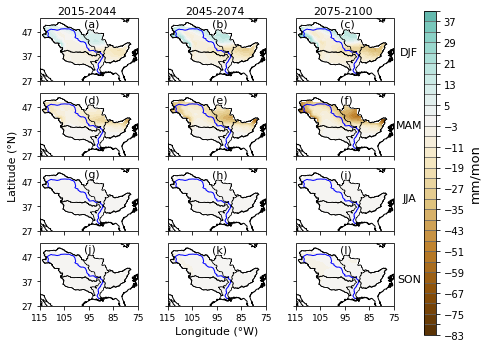

In [147]:

fraction_seasonMax = 3.9
nDiv_seasonMax = int(vmax_djfTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

tickFontSize = 9
textFontSize = 11
legendFontSize = 10
titleFontSize = 11

cbarTickFontSize = 10
cbarTextFontSize = 13


linewidth = 0.7

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Plot for August
#   https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))


norm = MidpointNormalize(vmin=vmin_mamTot_scenEraThree, vmax=vmax_djfTot_scenEraThree+0, midpoint=0)
levels = np.linspace(vmin_mamTot_scenEraThree, vmax_djfTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax)) # to draw 11 levels
boundaries=np.linspace(vmin_mamTot_scenEraThree,vmax_djfTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax))


latTickLebelsStr = ['27', '37', '47', ]
lonTickLebelsStr = ['115', '105', '95', '85', '75',]

latTicks = [27, 37, 47]
lonTicks = [-115, -105, -95, -85, -75]

yLimLow = 27
yLimHigh = 52.5

xLimLow = -115
xLimHigh = -75
#+++++++++++++++++++++++++++++++++++++++++

fig = plt.figure(figsize=(11, 5), constrained_layout=True)
axs = [plt.subplot(4, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(12)]

print(axs)
ax1 = axs[0]

cp1 = ax1.contourf(x_Us, y_Us,param_djfTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)
                              
plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax1.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
missi = cfeature.ShapelyFeature(basin_Missi, ccrs.PlateCarree())
arkansas = cfeature.ShapelyFeature(basin_Arkansas, ccrs.PlateCarree())
missouri = cfeature.ShapelyFeature(basin_Missouri, ccrs.PlateCarree())
ohio = cfeature.ShapelyFeature(basin_Ohio, ccrs.PlateCarree())

ax1.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax1.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax1.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax1.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax1.add_feature(cfeature.COASTLINE)
ax1.set_xlim([xLimLow, xLimHigh])
ax1.set_ylim([yLimLow, yLimHigh])

ax1.set_yticks(latTicks) 
ax1.set_xticks(lonTicks) 

latTickLebelsStr = ['27', '37', '47', ]

ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax1.set_xticklabels('', fontSize = tickFontSize)

ax1.set_title('(a)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')

ax1.text(-108.0, 54, r'2015-2044', fontsize=titleFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
cp2 = ax2.contourf(x_Us, y_Us,param_djfTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p2 = ax2.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax2.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax2.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax2.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax2.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax2.add_feature(cfeature.COASTLINE)
ax2.set_xlim([xLimLow, xLimHigh])
ax2.set_ylim([yLimLow, yLimHigh])

ax2.set_yticks(latTicks) 

ax2.set_yticklabels('', fontSize = tickFontSize)

ax2.set_xticks(lonTicks) 

ax2.set_xticklabels('', fontSize = tickFontSize)

ax2.set_title('(b)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
ax2.text(-108.0, 54, r'2045-2074', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax3 = axs[2]
cp3 = ax3.contourf(x_Us, y_Us,param_djfTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax3.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax3.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax3.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax3.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax3.add_feature(cfeature.COASTLINE)
ax3.set_xlim([xLimLow, xLimHigh])
ax3.set_ylim([yLimLow, yLimHigh])

ax3.set_yticks(latTicks) 

ax3.set_yticklabels('', fontSize = tickFontSize)

ax3.set_xticks(lonTicks) 

ax3.set_xticklabels('', fontSize = tickFontSize)

ax3.set_title('(c)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')

ax3.text(-108.0, 54, r'2075-2100', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
cp4 = ax4.contourf(x_Us, y_Us,param_mamTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax4.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax4.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax4.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax4.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax4.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax4.add_feature(cfeature.COASTLINE)

ax4.set_xlim([xLimLow, xLimHigh])
ax4.set_ylim([yLimLow, yLimHigh])

ax4.set_yticks(latTicks) 

ax4.set_xticks(lonTicks) 

ax4.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax4.set_xticklabels('', fontSize = tickFontSize)

ax4.set_ylabel('Latitude (°N)', fontsize = textFontSize, y=-0.15)
ax4.set_title('(d)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax5 = axs[4]
cp5 = ax5.contourf(x_Us, y_Us,param_mamTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p5 = ax5.get_position().get_points().flatten()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax5.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax5.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax5.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax5.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax5.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax5.add_feature(cfeature.COASTLINE)
ax5.set_xlim([xLimLow, xLimHigh])
ax5.set_ylim([yLimLow, yLimHigh])

ax5.set_yticks(latTicks) 

ax5.set_yticklabels('', fontSize = tickFontSize)

ax5.set_xticks(lonTicks) 

ax5.set_xticklabels('', fontSize = tickFontSize)

ax5.set_title('(e)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
cp6 = ax6.contourf(x_Us, y_Us,param_mamTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax6.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax6.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax6.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax6.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax6.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax6.add_feature(cfeature.COASTLINE)
ax6.set_xlim([xLimLow, xLimHigh])
ax6.set_ylim([yLimLow, yLimHigh])

ax6.set_yticks(latTicks) 

ax6.set_yticklabels('', fontSize = tickFontSize)

ax6.set_xticks(lonTicks) 

ax6.set_xticklabels('', fontSize = tickFontSize)
ax6.set_title('(f)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax7 = axs[6]
cp7 = ax7.contourf(x_Us, y_Us,param_jjaTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax7.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax7.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax7.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax7.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax7.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax7.add_feature(cfeature.COASTLINE)

ax7.set_xlim([xLimLow, xLimHigh])
ax7.set_ylim([yLimLow, yLimHigh])

ax7.set_yticks(latTicks) 

ax7.set_xticks(lonTicks) 

ax7.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)

ax7.set_xticklabels('', fontSize = tickFontSize)

ax7.set_title('(g)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
cp8 = ax8.contourf(x_Us, y_Us,param_jjaTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p8 = ax8.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax8.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax8.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax8.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax8.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax8.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax8.add_feature(cfeature.COASTLINE)
ax8.set_xlim([xLimLow, xLimHigh])
ax8.set_ylim([yLimLow, yLimHigh])

ax8.set_yticks(latTicks) 

ax8.set_yticklabels('', fontSize = tickFontSize)

ax8.set_xticks(lonTicks) 

ax8.set_xticklabels('', fontSize = tickFontSize)

ax8.set_title('(h)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax9 = axs[8]
cp9 = ax9.contourf(x_Us, y_Us,param_jjaTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax9.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax9.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax9.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax9.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax9.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax9.add_feature(cfeature.COASTLINE)
ax9.set_xlim([xLimLow, xLimHigh])
ax9.set_ylim([yLimLow, yLimHigh])

ax9.set_yticks(latTicks) 

ax9.set_yticklabels('', fontSize = tickFontSize)

ax9.set_xticks(lonTicks) 

ax9.set_xticklabels('', fontSize = tickFontSize)

ax9.set_title('(i)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax10 = axs[9]
cp10 = ax10.contourf(x_Us, y_Us,param_sonTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax10.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax10.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax10.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax10.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax10.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax10.add_feature(cfeature.COASTLINE)

ax10.set_xlim([xLimLow, xLimHigh])
ax10.set_ylim([yLimLow, yLimHigh])

ax10.set_yticks(latTicks) 

ax10.set_xticks(lonTicks) 

ax10.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax10.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)

ax10.set_title('(j)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax11 = axs[10]
cp11 = ax11.contourf(x_Us, y_Us,param_sonTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

p11 = ax11.get_position().get_points().flatten()
cbax11 = fig.add_axes([p11[0]+0.18, +0.02, (p11[2]-p11[0])*0.12, 0.9])

cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries, orientation = 'vertical') 
cbar11.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for label in cbar11.ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
    
cbar11.set_label("mm/mon", fontsize = cbarTextFontSize)


plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax11.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax11.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax11.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax11.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax11.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax11.add_feature(cfeature.COASTLINE)
ax11.set_xlim([xLimLow, xLimHigh])
ax11.set_ylim([yLimLow, yLimHigh])


ax11.set_yticks(latTicks) 

ax11.set_xticks(lonTicks) 

ax11.set_yticklabels('', fontSize = tickFontSize)

ax11.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)

ax11.set_xlabel('Longitude (°W)', fontsize = textFontSize)

ax11.set_title('(k)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
cp12 = ax12.contourf(x_Us, y_Us,param_sonTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax12.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax12.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax12.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax12.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax12.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax12.add_feature(cfeature.COASTLINE)
ax12.set_xlim([xLimLow, xLimHigh])
ax12.set_ylim([yLimLow, yLimHigh])

ax12.set_yticks(latTicks) 

ax12.set_yticklabels('', fontSize = tickFontSize)
 
ax12.set_xticks(lonTicks) 

ax12.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)

ax12.set_title('(l)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize,loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.text(-325, 24, 'DJF', fontsize=titleFontSize)
plt.text(-360, -4, 'MAM', fontsize=titleFontSize)
plt.text(-290, -32, 'JJA', fontsize=titleFontSize)
plt.text(-350, -63, 'SON', fontsize=titleFontSize)

plt.subplots_adjust(left=0.13,
                    bottom=0.1,
                    right=0.6,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.2)

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\snowmelt\seasonal\tcfSnowmeltSeasMap.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\snowmelt\seasonal\tcfsnowmeltSeasMap.png', dpi=600)  




plt.show()

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [148]:
STOP here ==========

SyntaxError: invalid syntax (<ipython-input-148-c600284d600b>, line 1)